# Keras拆解多分类的使用实例详解

####   sklearn.model_selection.train_test_split(*arrays, **options)

```arrays```分割对象同样长度的列表或者numpy arrays（矩阵）；  
```test_size```两种指定方法。1：指定小数，小数范围在0.0-0.1之间，它代表test占数据集的比例。
2 指定整数。整数的大小必须在数据集个数范围内，如果test_size没有指定，可以通过train_size来指定。如果train_size也没有指定，那么默认值是0.25。  
```train_size```和test_size类似  
```random_state```:这是将分割的training和testing 集合打乱的个数设定，如果不指定的话，也可以通过numpy.random来设定随机数。e.g.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 读取train.csv
df = pd.read_csv('./jigsaw-toxic-comment-classification-challenge/train.csv')

In [2]:
df.shape

(159571, 8)

In [3]:
namelist_train, namelist_test = train_test_split(df, test_size=0.3)

In [4]:
namelist_test.shape, namelist_train.shape

((47872, 8), (111699, 8))

In [5]:
namelist_train, namelist_test = train_test_split(df, test_size=100)
namelist_test.shape, namelist_train.shape

((100, 8), (159471, 8))

### * from sklearn.metrics import roc_auc_score

```怎么评价一个模型的好坏？```  
<b>```Regression```</b>是直接按误差，$\frac{\Delta t}{t}$，但是<b>```Classification```</b>则不好评估，因此有以下几个指标： 
* 1 Accuracy： 评价的所有结果中有几个正确的，不做类别细粒度区分。$Acc = \frac{n_{评价正确的个数}}{N_{评价结果总个数}}$  
* 2 Precision: 有更细类别的区分，预测正确的个数/针对某个类别的预测结果个数。$Precision = \frac{t_p}{t_p+f_p}$  
* 3 Recall召回率：有更细的类别区分。预测结果中正确的个数/原本标签中此类别的个数。$Recall = \frac{t_p}{t_p+t_f}$
* 4 AUC：Aera under the curving，在预测曲线ROC之下的面积，这个面积越大说明模型效果越好。AUC牵扯几个指标：  
> True_Postive_Rate: TPR---$\frac{TP}{TP+FN}$ 预测的正类中实际正实例站所有正实例的比例  
> False_Postive_Rate: FPR---$\frac {FP}{FP+TN}$ 预测的正类中实际是负实例占所有负实例的比例
#而在划分正负类的阈值变化$0-->1$情况下，FPR为横轴，TPR为纵轴建立ROC曲线，那么在这个曲线之下的面积就是AUC，TPR=1，FPR=0,即坐标图中的(0,1)点，故ROC曲线越靠拢(0,1)点，越偏离45度对角线越好

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
y_true = np.array([1,1,2,2])
y_score = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, threshoulds = roc_curve(y_true, y_score, pos_label=2)
print(fpr, tpr, threshoulds)
roc_auc_score(y_true, y_score)

[0.  0.  0.5 0.5 1. ] [0.  0.5 0.5 1.  1. ] [1.8  0.8  0.4  0.35 0.1 ]


0.75

In [23]:
? roc_curve

* 解答上述问题需要明白其中的2点，y_score是什么？y_score是指预测结果为正实例的概率。pos_label默认值是None，y_true在{-1,1}或{0,1}之内，此时pos_label=1，而在其他情况下必须指定pos_label。上述计算过程:
threshould是从score的高到低开始，当threshould取0.8时，score大于0.8的值就是正实例，预测结果为$[0,0,0,1]$  
那么对于正样本【2】来说，预测结果中只有一个预测对了，因此TPR计算：  
$$TPR = \frac{t_p}{t_p + f_n} = \frac{1}{1+1}=0.5$$
而对于负样本【1】来说，预测结果都是正确的，那么$f_p = 0$,因此FPR计算：
$$FPR = \frac{f_p}{f_p + t_n} = \frac{0}{0+2}=0$$

* 当阈值取0.4时，score中大于等于0.4的均是正实例，那么此时$\hat{y}= [1,2,1,2]$，那么正负样本中各有一个预测错了，，因此$$TPR=FPR=0.5$$  
* 而当阈值取0.35时，对应的预测结果为$[1,2,2,2]$，那么正样本【2】中全预测正确，但负样本【1】中有一个预测正确，此时$$TPR =1,~~FPR =0.5$$  
* 当阈值取0.1时，预测结果为$[2,2,2,2]$，那么正样本【2】结果预测全部正确，但负样本【1】预测全部不正确，因此$$TPR=1, FPR=1$$

In [29]:
%%markdown 
roc_curve可以用下面的图来表示：

roc_curve可以用下面的图来表示：


([<matplotlib.axis.YTick at 0x204cb038a20>,
 <a list of 2 Text yticklabel objects>)

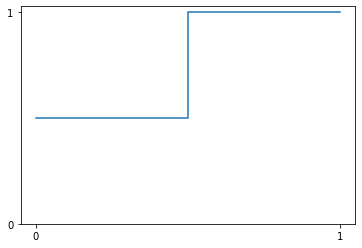

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
tpr = [0.5, 0.5, 1,   1]
fpr = [0,   0.5, 0.5, 1]
plt.plot(fpr, tpr)
plt.xticks([0,1])
plt.yticks([0,1])

* 因此根据折线下面的面积，$$AUC = 0.75$$

> * 上述的计算过程实际上是将```【1】```和```【2】```看做多个类，y_score是得分，表示预测结果是```【1】```或者```【2】```的正确概率

<b>* from keras.preprocessing import text, sequence

sequence.pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)  
将多个序列截断或补齐为相同的长度。  
该函数将一个 num_samples 的序列（整数列表）转化为一个 2D Numpy 矩阵，其尺寸为 (num_samples, num_timesteps)。 num_timesteps 要么是给定的 maxlen 参数，要么是最长序列的长度。

比```num_timesteps```长的序列将会被截断以满足所需要的长度。补齐或截断发生的位置分别由```padding```和```turncating```决定

向前补齐为默认操作。即$padding = truncating = pre$， e.g.

In [42]:
eg_sequences = np.array([[1,2,3,4,5],[9,1,23,4],[33,5,6,7,8,94,4,2]])
eg_max_len = 5
sequence.pad_sequences(eg_sequences,eg_max_len)

array([[ 1,  2,  3,  4,  5],
       [ 0,  9,  1, 23,  4],
       [ 7,  8, 94,  4,  2]])

In [43]:
sequence.pad_sequences(eg_sequences,eg_max_len,padding='post',truncating='post')

array([[ 1,  2,  3,  4,  5],
       [ 9,  1, 23,  4,  0],
       [33,  5,  6,  7,  8]])

* Text preprocessing

In [45]:
text.Tokenizer(num_words=None,
               filters='!"#$$%^&*"',
               lower=True,
               split=' ',
               char_level=False,
               oov_token=None,
               document_count=0
)

文本标记实用类

该类允许实用两种方法向量化一个文本语料库：将每个文本转化为一个整数序列（每个整数都是词典中标记的索引）；或者将其转化为一个向量，其中每个标记的系数可以是二进制值、词频、TF_IDF权重等

num_words: 需要保留的最大词数，基于词频。只有最常出现的num_words词会被保留；  
filter：一个字符串，其中每个元素是一个这个文本中过滤掉的字符，默认值是所有标点符号，加上制表符和换行符，减去```'```字符。  
lower: 布尔值。是否将文本转换为小写。  
split: 字符串。按该字符串切割文本。  
char_level:如果为True，则每个字符都将被视为标记。  
oov_token: 如果给出，他将被添加到word_index中，并用于在text_to_sequence调用期间替换词汇表外的单词

* 默认情况下，删除所有的标点符号，将文本转换为空格分割的单词索引，但单词中可能含有```'```字符。这些序列然后被分割成标记列表。然后将被索引和向量化。'

In [166]:
eg_tokennizer = text.Tokenizer(num_words=20)
eg_tokennizer.fit_on_texts(['i am a china, do you know lily\'s bird, would you love me?','i love huahua, dou you love me?'])

In [172]:
eg_tokennizer.word_counts

OrderedDict([('i', 2),
             ('am', 1),
             ('a', 1),
             ('china', 1),
             ('do', 1),
             ('you', 3),
             ('know', 1),
             ("lily's", 1),
             ('bird', 1),
             ('would', 1),
             ('love', 3),
             ('me', 2),
             ('huahua', 1),
             ('dou', 1)])

In [173]:
eg_tokennizer.word_index

{'you': 1,
 'love': 2,
 'i': 3,
 'me': 4,
 'am': 5,
 'a': 6,
 'china': 7,
 'do': 8,
 'know': 9,
 "lily's": 10,
 'bird': 11,
 'would': 12,
 'huahua': 13,
 'dou': 14}

* text_to_sequence

text.text_to_word_sequence(text,
                           filters='$',
                           lower=True,
                           split=' '
)
将文本转换为单词（或标记）的序列  
text: 输入的文本（字符串）。  
filter：要过滤的字符列表（或连接），如标点符号，默认是基本标点符号，制表符和换行符。
lower:布尔值，是否将文本转换为小写
split：字符值，按该字符串切割文本。

In [167]:
X_ = eg_tokennizer.texts_to_sequences(['i am a china, do you know lily\'s bird, would you love me?','i love huahua, dou you love me?'])

In [170]:
X_

[[3, 5, 6, 7, 8, 1, 9, 10, 11, 12, 1, 2, 4], [3, 2, 13, 14, 1, 2, 4]]

In [168]:
x_ = sequence.pad_sequences(X_, maxlen=5)

* 中文单词被数字化后也可以使用sequence.pad_sequence()进行截断和补齐

In [169]:
x_

array([[11, 12,  1,  2,  4],
       [13, 14,  1,  2,  4]])

<b>* from keras.models import Model

keras中的model类

<b > * from keras.layers import Embedding

```keras.layers.Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)```   
\
将正整数（索引值）转换为固定尺寸的稠密向量。  
imput_dim: int>0。词汇表大小，即最大整数index+1。  
output_dim: int>0。词向量的维度。  
embeddings_initializer: ```embeddings```矩阵初始化方法（详见initializers）。  

## 例子1  Toxic Comment classification

In [1]:
#coding: utf-8

In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, concatenate
from keras.layers import GRU, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing import text, sequence
from keras.callbacks import Callback

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['OMP_NUM_THREADS'] = '4'

Using TensorFlow backend.


In [2]:
EMBEDDING_FILE = './crawl-300d-2M.vec/crawl-300d-2M.vec'

train = pd.read_csv('./jigsaw-toxic-comment-classification-challenge/train.csv')
test = pd.read_csv('./jigsaw-toxic-comment-classification-challenge/test.csv')
submission = pd.read_csv('./jigsaw-toxic-comment-classification-challenge/sample_submission.csv')

In [3]:
X_train = train["comment_text"].fillna("fillna").values
y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
X_test = test["comment_text"].fillna("fillna").values

In [4]:
max_features = 30000  # 理解为3W个句子的词典
maxlen = 100  # 单个句子的最大长度
embed_size = 300  # 词向量的维度

In [5]:
tokenizer = text.Tokenizer(num_words=max_features)  # 建立句子库，句子数目为30000
tokenizer.fit_on_texts(list(X_train) + list(X_test))  # 填充句子库

In [6]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [7]:
x_train = sequence.pad_sequences(X_train, maxlen=maxlen) # 一句话长为100单词
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [13]:
def get_coefs(word, *arr): return word, np.asarray(arr, dtype='float32')  # asarray不会copy新的副本

In [14]:
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf-8'))

In [15]:
word_index = tokenizer.word_index

In [16]:
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))  # 构建新的词向量矩阵

In [17]:
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

### 到此为止构建词向量矩阵完成

##下面开始建立AUC评价

In [8]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)  # AUC值
            print("\n ROC-AUC - epoch: %d - score: %.6f \n" % (epoch+1, score))


In [18]:
embedding_matrix.shape

(30000, 300)

In [21]:
def get_model():
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(GRU(80, return_sequences=True))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])  # 按照axis=-1（行）串联起来输出张量
    outp = Dense(6, activation="sigmoid")(conc)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [16]:
embedding_matrix.shape

(30000, 300)

In [22]:
model = get_model()
batch_size = 32
epochs = 2

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
X_tra, X_val, y_tra, y_val = train_test_split(x_train, y_train, train_size=0.95, random_state=233)
RocAuc = RocAucEvaluation(validation_data=(X_val, y_val), interval=1)

In [25]:
hist = model.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),
                 callbacks=[RocAuc], verbose=2)


Train on 151592 samples, validate on 7979 samples
Epoch 1/2
 - 1336s - loss: 0.0495 - accuracy: 0.9821 - val_loss: 0.0459 - val_accuracy: 0.9823

 ROC-AUC - epoch: 1 - score: 0.986562 

Epoch 2/2
 - 1278s - loss: 0.0375 - accuracy: 0.9854 - val_loss: 0.0447 - val_accuracy: 0.9831

 ROC-AUC - epoch: 2 - score: 0.987162 



In [26]:
y_pred = model.predict(x_test, batch_size=1024)
submission[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]] = y_pred
submission.to_csv('submission.csv', index=False)

In [32]:
X_tra[3]

array([  665,    22,     1,  5178,    18,  2276,     2,    16,   497,
         412,    25,    60,    61,  8238,   939,    17,     8,   828,
           1,   198,    10,  3778,   151,     4,   412,    10,     1,
        2665,    27,  1272,     3,  1085,   763,  2215,   763,   162,
           7,   125,     7,     8,     1, 11370,   562,  1968,     6,
          39,    66,   350,    13,    17,   763,   162,   739,   162,
         501,   125,   739,     8,     1,   325,   562,  1968,     5,
         501,     8,     1,  1968,     3,  7777,    84,     6,    94,
           1,   114,  6293,    12,   739,    11,  9160,     2,     7,
         501,    80,   501,     8,   610,    25,    22,     1,  5178,
          18,  6062,   163,     9,   288,    77,     4, 10604,    43,
          34])